In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score
import lightgbm as lgb
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import requests
import torch


In [ ]:

df=pd.read_csv("/content/sustainable_soil_health.csv")

In [ ]:
df.head()

N          P          K        pH   Moisture  Soil_Health
0  37.454012  51.908179  67.270299  7.196847  64.825695    61.084823
1  95.071431  47.918188  79.668140  6.811685  17.238636    70.478745
2  73.199394   2.564207  25.046790  5.796830  87.239456    40.885614
3  59.865848  34.124783  62.487410  4.529090  61.311624    49.638596
4  15.601864  38.019562  57.174598  6.733076  15.720388    47.911425

In [ ]:
df.isna().sum()

N              0
P              0
K              0
pH             0
Moisture       0
Soil_Health    0
dtype: int64

No null value


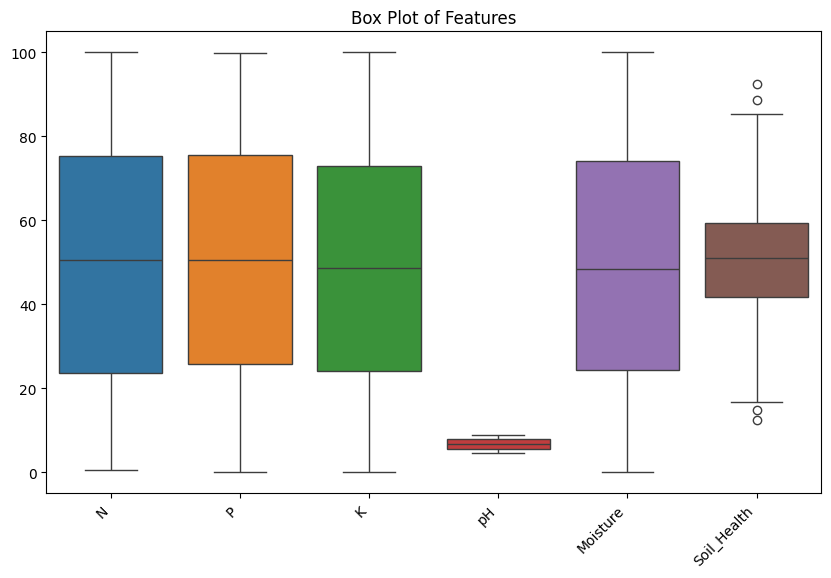

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45, ha='right')
plt.title('Box Plot of Features')
plt.show()


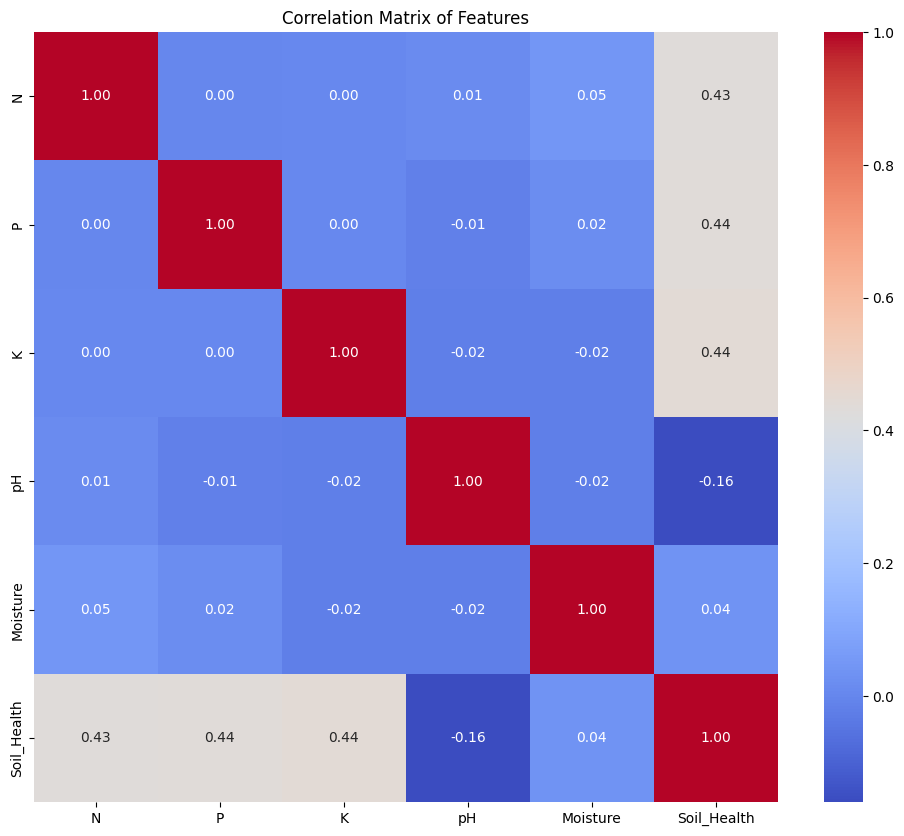

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


In [ ]:

X = df.drop('Soil_Health', axis=1)
y = df['Soil_Health']


In [ ]:
X.shape

(1500, 5)

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)




RMSE (Root Mean Squared Error) - Measures how much your predictions deviate from the actual values

MAE (Mean Absolute Error) - Measures the average absolute error in predictions.

R² Score - Indicates how well the model explains variance (closer to 1 is better).

In [ ]:
#!pip install torch torchvision torchaudio pytorch-tabnet

In [ ]:
from pytorch_tabnet.tab_model import TabNetRegressor

In [ ]:
# Convert to NumPy arrays (TabNet requires NumPy)
# Reshape target variable
#y_train = y_train.reshape(-1, 1)
##y_test = y_test.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)
X_train = np.array(X_train, dtype=np.float32)
X_test = np.array(X_test, dtype=np.float32)
y_train = np.array(y_train, dtype=np.float32)
y_test = np.array(y_test, dtype=np.float32)

In [ ]:
 modeltb = TabNetRegressor()

In [ ]:
modeltb.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    max_epochs=100,
    patience=10,
    batch_size=256,
    virtual_batch_size=128
)

epoch 0  | loss: 2689.20361| val_0_mse: 2474.66968|  0:00:00s
epoch 1  | loss: 2449.117| val_0_mse: 2254.22461|  0:00:00s
epoch 2  | loss: 2260.85443| val_0_mse: 2124.18701|  0:00:00s
epoch 3  | loss: 2065.26788| val_0_mse: 2000.26807|  0:00:00s
epoch 4  | loss: 1903.00812| val_0_mse: 1863.10669|  0:00:00s
epoch 5  | loss: 1687.5802| val_0_mse: 1692.46436|  0:00:00s
epoch 6  | loss: 1444.68839| val_0_mse: 1452.42712|  0:00:01s
epoch 7  | loss: 1240.1293| val_0_mse: 1308.41357|  0:00:01s
epoch 8  | loss: 989.23216| val_0_mse: 1166.19727|  0:00:01s
epoch 9  | loss: 789.58522| val_0_mse: 967.22394|  0:00:01s
epoch 10 | loss: 578.30154| val_0_mse: 772.11182|  0:00:01s
epoch 11 | loss: 385.98382| val_0_mse: 578.013 |  0:00:01s
epoch 12 | loss: 231.70994| val_0_mse: 401.85147|  0:00:01s
epoch 13 | loss: 118.14897| val_0_mse: 297.81717|  0:00:01s
epoch 14 | loss: 58.3869 | val_0_mse: 198.767 |  0:00:02s
epoch 15 | loss: 50.18525| val_0_mse: 158.68356|  0:00:02s
epoch 16 | loss: 49.45241| val_

In [ ]:
# Evaluate model
y_pred = modeltb.predict(X_test)
mse = np.mean((y_pred - y_test) ** 2)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 2.2734895


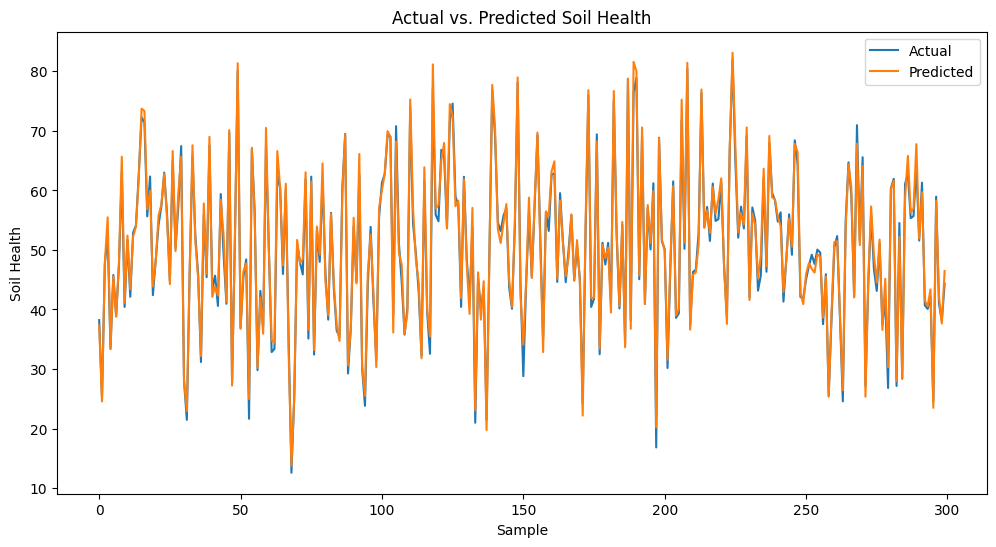

In [ ]:
# prompt: give me accuracy plot

import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined from your previous code
# ... (your existing code) ...

# Assuming 'modeltb' is your trained TabNetRegressor model
# and you have already made predictions 'y_pred' on the test set

# Create the accuracy plot
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Soil Health')
plt.title('Actual vs. Predicted Soil Health')
plt.legend()
plt.show()


In [ ]:
# prompt: give me accuracy f1 score

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming y_test and y_pred are already defined from your previous code
# ... (your existing code) ...

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")


Root Mean Squared Error (RMSE): 1.5078094956758443
R-squared (R2): 0.9870572090148926


In [ ]:
# prompt: i want to save both file scaler and pickle file

import pickle
from joblib import dump

# ... (your existing code) ...

# Save the scaler
dump(scaler, 'scaler.joblib')

# Save the model
with open('tabnet_model.pkl', 'wb') as f:
    pickle.dump(modeltb, f)


In [ ]:
# prompt: i want to save this model in pickle model

import pickle

# ... (your existing code) ...

# Assuming 'modeltb' is your trained TabNetRegressor model

# Save the model to a pickle file
with open('tabnet_model.pkl', 'wb') as file:
    pickle.dump(modeltb, file)


In [ ]:
# prompt: No module named 'lime'

!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 15.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=ff97d1978728d6943cee622c20efa4e7b244f4bf1d38fd6fbb1fbd348a4027f6
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular
import numpy as np

In [ ]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    mode="regression",  # Use "classification" if your model is for classification
    feature_names=df.columns[:-1],  # Adjust according to your dataset
    discretize_continuous=True  # Helps interpret continuous features
)


In [ ]:
sample_instance = X_test[0].reshape(1, -1)  # Select one instance to explain


In [ ]:
exp = explainer.explain_instance(
    sample_instance.flatten(),  # Convert to 1D for LIME
    modeltb.predict,  # Your trained model's prediction function
    num_features=5  # Number of features to display in explanation
)


In [ ]:
exp.show_in_notebook()


In [ ]:


def make_prediction_with_lime():
    # Get user input for each feature
    try:
        features = []
        feature_names = X.columns  # Assuming X is defined in the global scope

        for feature_name in feature_names:
            while True:
                try:
                    value = float(input(f"Enter value for {feature_name}: "))
                    features.append(value)
                    break
                except ValueError:
                    print("Invalid input. Please enter a numeric value.")

        # Create input array
        input_array = np.array(features).reshape(1, -1)

        # Scale the input array using the same scaler used for training
        scaled_input = scaler.transform(input_array)

        # Predict using the TabNet model
        tabnet_pred = modeltb.predict(scaled_input)

        print(f"Predicted Soil Health (TabNet): {tabnet_pred[0][0]:.4f}")

        # LIME explanation
        explainer = lime.lime_tabular.LimeTabularExplainer(
            training_data=X_train,
            feature_names=list(X.columns),
            class_names=['Soil_Health'],
            mode='regression'
        )

        exp = explainer.explain_instance(
            scaled_input[0],
            modeltb.predict,
            num_features=5
        )

        exp.show_in_notebook()

    except Exception as e:
        print(f"An error occurred: {e}")

make_prediction_with_lime()


Predicted Soil Health (TabNet): 62.3152


Enter value for N: 40
Enter value for P: 40
Enter value for K: 150
Enter value for pH: 6.5
Enter value for Moisture: 60


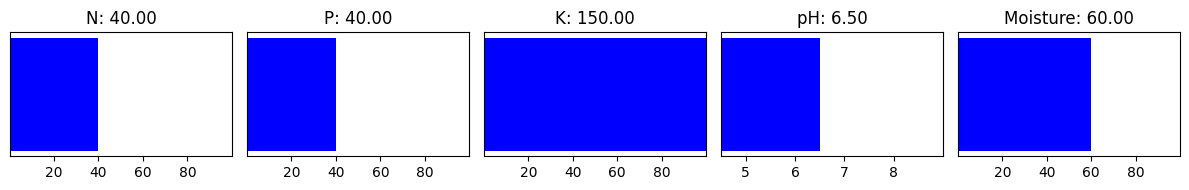


🔮 Predicted Soil Health Index: 78.5681
✅ Soil health is **Good**. No major issues! 🌱


In [ ]:
import numpy as np
import lime.lime_tabular
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

def make_prediction_with_lime():
    try:
        features = []
        feature_names = X.columns  # Assuming X is globally defined

        fig, axes = plt.subplots(1, len(feature_names), figsize=(12, 2))  # One row, multiple columns

        for i, feature_name in enumerate(feature_names):
            while True:
                try:
                    value = float(input(f"Enter value for {feature_name}: "))
                    features.append(value)

                    # Display all gauge meters in one row
                    axes[i].barh([0], [value], color='blue')
                    axes[i].set_xlim([min(X[feature_name]), max(X[feature_name])])  # Adjust range based on dataset
                    axes[i].set_title(f"{feature_name}: {value:.2f}")
                    axes[i].set_yticks([])  # Remove y-axis ticks for better visibility
                    break
                except ValueError:
                    print("Invalid input. Please enter a numeric value.")

        plt.tight_layout()
        plt.show()  # Display all gauges at once

        # Convert input to NumPy array
        input_array = np.array(features).reshape(1, -1)

        # Scale the input using the same scaler used in training
        scaled_input = scaler.transform(input_array)

        # Make prediction using TabNet model
        tabnet_pred = modeltb.predict(scaled_input)
        prediction_score = tabnet_pred[0][0]
        print(f"\n🔮 Predicted Soil Health Index: {prediction_score:.4f}")

        # Define soil health categories
        if prediction_score < 30:
            print("⚠️ Warning: Soil health is **Poor**! Immediate action needed! ❌")
        elif 30 <= prediction_score < 60:
            print("🟡 Soil health is **Moderate**. Consider improving nutrients! ⚠️")
        else:
            print("✅ Soil health is **Good**. No major issues! 🌱")

        # LIME Explanation
        explainer = lime.lime_tabular.LimeTabularExplainer(
            training_data=X_train,
            feature_names=list(X.columns),
            class_names=['Soil_Health'],
            mode='regression'
        )

        exp = explainer.explain_instance(
            scaled_input[0],
            modeltb.predict,
            num_features=5
        )

        # Show LIME explanation
        exp.show_in_notebook()

    except Exception as e:
        print(f"⚠️ An error occurred: {e}")

# Run function
make_prediction_with_lime()
